# Feature extraction

In [13]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot, heatmap
from sklearn.metrics import median_absolute_error, r2_score
from camcan.datasets import load_camcan_behavioural
from camcan.datasets import load_camcan_behavioural_feature
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold, cross_val_predict
%matplotlib inline

In [2]:
data_directory = "/home/arthur/arthur_imbert/dev/cc700-scored"
path_data = os.path.join(data_directory, "total_score.csv")
path_features_map = os.path.join(data_directory, "behavioural_features.json")
path_participant_info = os.path.join(data_directory, "participant_data.csv")
path_selected_features = \
    "/home/arthur/arthur_imbert/dev/camcan_analysis/data/features"

In [3]:
experiences = ["BentonFaces",
               "CardioMeasures",
               "Cattell",
               "EkmanEmHex",
               "EmotionalMemory",
               "EmotionRegulation",
               "FamousFaces",
               "ForceMatching",
               "HomeInterview",
               "Hotel",
               "MotorLearning",
               "MRI",
               "PicturePriming",
               "Proverbs",
               "RTchoice",
               "RTsimple",
               "Synsem",
               "TOT",
               "VSTMcolour"]

## Functions

In [4]:
def get_df_experiment(name_experience, path_features_map, path_data,
                      path_participant_info):
    """
    Function to make a dataframe from an experiment ready to be plotted
    :param name_experience: str,
                name of the experience to export
    :param path_features_map: str,
                path of the json file containing the map of the features
    :param path_data: str,
                path of csv file containing all the behavioural datasets
    :param path_participant_info: str,
                path of the csv file containing the variable age
    :return: dataframe
    """
    features_exp = load_camcan_behavioural_feature(
        name_experiment=name_experience,
        features_map=path_features_map)
    features_to_load = ["Observations"] + [c for c in features_exp]
    dataset = load_camcan_behavioural(filename_csv=path_data,
                                      patients_info_csv=path_participant_info,
                                      patients_excluded=None,
                                      column_selected=features_to_load)
    X = dataset.data
    y = dataset.scores.age
    features_to_plot = [feat for feat in features_exp
                        if X[feat].dtypes != object 
                        and X[feat].isnull().sum() < 100]
    if len(features_to_plot) == 0:
        return None
    else:
        X = X[features_to_plot]
    
    imp = Imputer()
    X = imp.fit_transform(X)
    X = pd.DataFrame(data=X,
                     columns=features_to_plot)
    X["age"] = y
    return X


def plot_heatmap_correlation(name_experience, df):
    """
    Function to plot a heatmap of the features' correlation
    :param name_experience: str
    :param df: dataframe
    :return:
    """
    heatmap(df.corr())
    plt.xticks(rotation='vertical')
    plt.yticks(rotation="horizontal")
    plt.title(name_experience, fontsize="larger", fontweight="bold")
    plt.show()
    return


def plot_pairplot_correlation(name_experience, df):
    """
    Function to plot a pairplot of the features
    :param name_experience: str
    :param df: dataframe
    :return:
    """
    pairplot(df)
    plt.title(name_experience, fontsize="larger", fontweight="bold")
    plt.show()
    return

## Manually selected features

In [5]:
# get data with selected features
selected_header = ["Observations"]
with open(path_selected_features, mode="rt", encoding="utf-8") as f:
    for row in f:
        selected_header.append(row.strip())
dataset = load_camcan_behavioural(filename_csv=path_data,
                                  patients_info_csv=path_participant_info,
                                  patients_excluded=None,
                                  column_selected=selected_header)
X = dataset.data
y = dataset.scores.age

# pipeline
pipeline = make_pipeline(Imputer(), Ridge())
y_pred = cross_val_predict(pipeline, X, y, cv=10)
print("R2 score: {}".format(r2_score(y, y_pred)))
print("Media absolute deviation score {}"
      .format(median_absolute_error(y, y_pred)), "\n")

R2 score: 0.5541895380417806
Media absolute deviation score 7.797050966730588 



## Plot per experiment

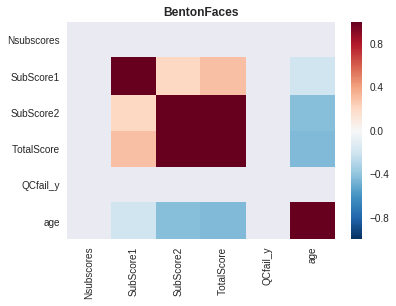

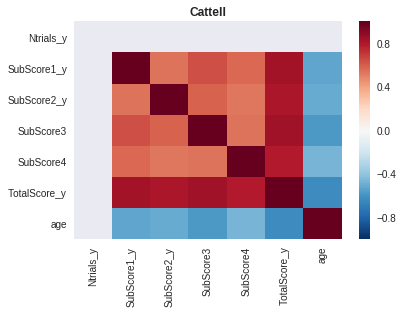

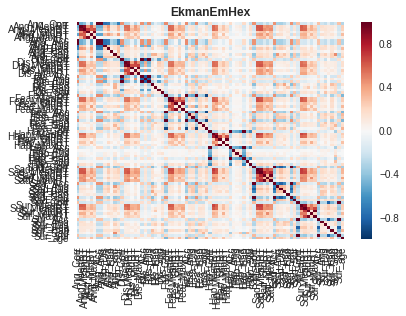

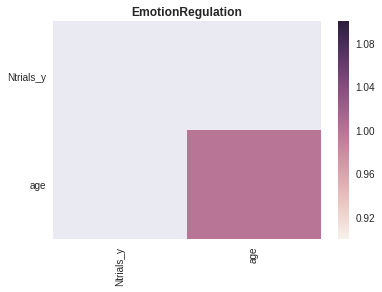

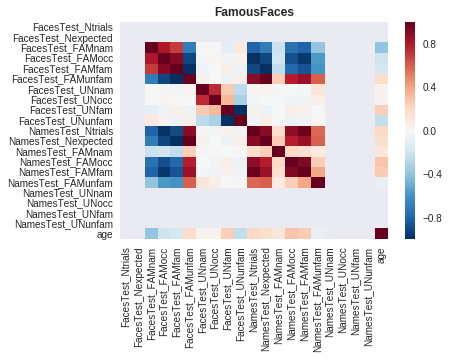

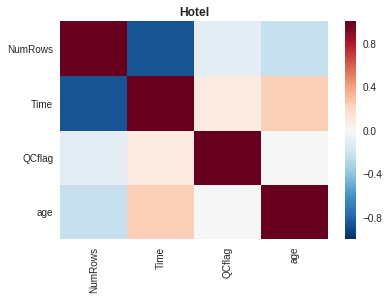

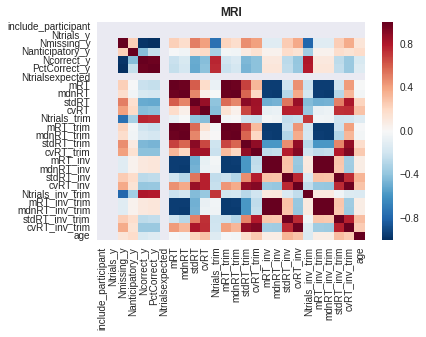

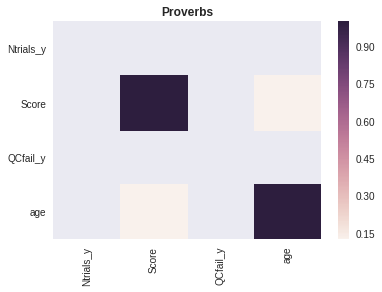

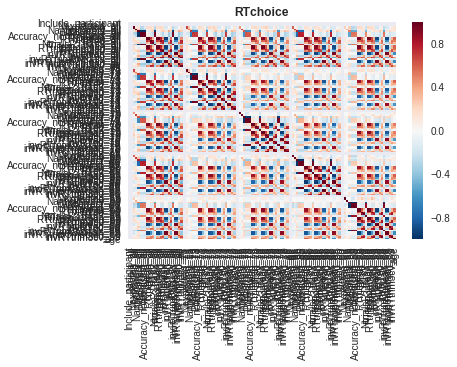

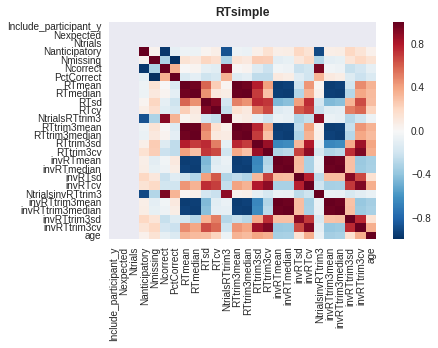

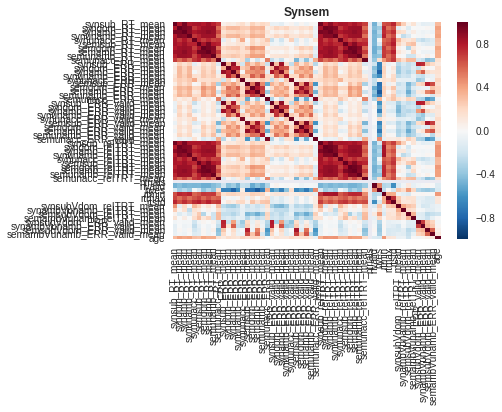

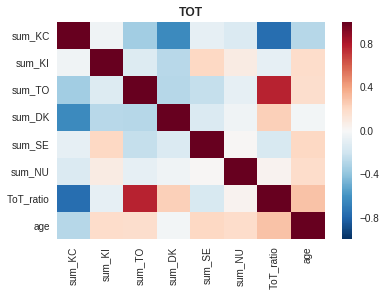

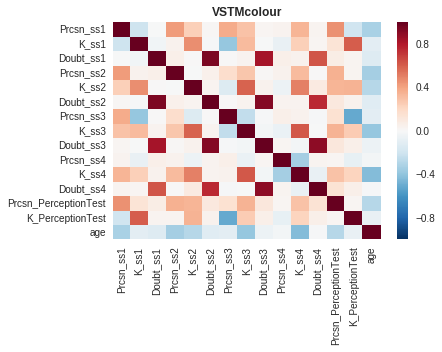

In [6]:
# plot correlation for each experiment
for exp in experiences:
    X = get_df_experiment(exp, path_features_map, path_data,
                          path_participant_info)
    if X is None:
        continue
    else:
        plot_heatmap_correlation(exp, X)
        # plot_pairplot_correlation(exp, X)

In [12]:
features = []
correlations = []
for exp in experiences:
    X = get_df_experiment(exp, path_features_map, path_data,
                          path_participant_info)
    if X is None:
        continue
    else:
        Z = X.corr()
        features = features + list(Z.columns)[:Z.shape[0]-1]
        correlations = correlations + list(Z["age"])[:Z.shape[0]-1]
correlations = [abs(c) for c in correlations]
correlations = np.array(correlations)
p = np.percentile(correlations, 80)

for i in range(len(correlations)):
    if correlations[i] > p:
        

['Nsubscores', 'SubScore1', 'SubScore2', 'TotalScore', 'QCfail_y']
(6, 6)
Index(['Nsubscores', 'SubScore1', 'SubScore2', 'TotalScore', 'QCfail_y',
       'age'],
      dtype='object')
['Ntrials_y', 'SubScore1_y', 'SubScore2_y', 'SubScore3', 'SubScore4', 'TotalScore_y']
(7, 7)
Index(['Ntrials_y', 'SubScore1_y', 'SubScore2_y', 'SubScore3', 'SubScore4',
       'TotalScore_y', 'age'],
      dtype='object')
['Ang_Corr', 'Ang_MedRT', 'Ang_MeanRT', 'Ang_StdRT', 'Ang_MinRT', 'Ang_MaxRT', 'Ang_Acc', 'Ang_Ang', 'Ang_Dis', 'Ang_Fea', 'Ang_Hap', 'Ang_Sad', 'Ang_Sur', 'Dis_Corr', 'Dis_MedRT', 'Dis_MeanRT', 'Dis_StdRT', 'Dis_MinRT', 'Dis_MaxRT', 'Dis_Acc', 'Dis_Ang', 'Dis_Dis', 'Dis_Fea', 'Dis_Hap', 'Dis_Sad', 'Dis_Sur', 'Fea_Corr', 'Fea_MedRT', 'Fea_MeanRT', 'Fea_StdRT', 'Fea_MinRT', 'Fea_MaxRT', 'Fea_Acc', 'Fea_Ang', 'Fea_Dis', 'Fea_Fea', 'Fea_Hap', 'Fea_Sad', 'Fea_Sur', 'Hap_Corr', 'Hap_MedRT', 'Hap_MeanRT', 'Hap_StdRT', 'Hap_MinRT', 'Hap_MaxRT', 'Hap_Acc', 'Hap_Ang', 'Hap_Dis', 'Hap_Fea', 'Hap_H